# Modeling

## 1. Libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data import

In [122]:
X = np.load('Data/X.npy')
y = np.load('Data/y.npy')

## 3. Spliting dataset into trainining and testing dataset

In [123]:
from sklearn.model_selection import train_test_split
seed = 300

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [124]:
print(X_train.shape, X_test.shape)

(700, 71) (300, 71)


## 4. Building predictive models

### 4.1. Baseline models

In the beginning we will verify the scores in baseline models with default parameters and no cost matrix.

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [7]:
Accuracy_list = []
Precision_list = []
Recall_list = []
F1_score_list = []
AUC_list = []
Gini_list = []
Algorithm_name_list = []


def fit_classifier(algorithm_list, X_train, X_test, y_train, y_test):
    for algorithm in algorithm_list.values():
            
        algorithm.fit(X_train, y_train)
        y_pred = algorithm.predict(X_test)

        Accuracy = accuracy_score(y_test, y_pred)
        Precision = precision_score(y_test, y_pred)
        Recall = recall_score(y_test, y_pred)
        F1_score= f1_score(y_test, y_pred)
        AUC = roc_auc_score(y_test, y_pred)
        Gini = (2 * (roc_auc_score(y_test, y_pred))) - 1
        
        Accuracy_list.append(Accuracy)
        Precision_list.append(Precision)
        Recall_list.append(Recall)
        F1_score_list.append(F1_score)
        AUC_list.append(AUC)
        Gini_list.append(Gini)
        
        Algorithm_name = list(algorithm_list.keys())[list(algorithm_list.values()).index(algorithm)]
        Algorithm_name_list.append(Algorithm_name)

 
    d = {'Method': Algorithm_name_list,
         'Accuracy': Accuracy_list,
         'Precision': Precision_list, 
         'Recall': Recall_list, 
         'F1': F1_score_list,
         'AUC': AUC_list,
         'Gini': Gini_list
         }
    df = pd.DataFrame(data=d)

    return df

In [8]:
algorithm_list ={'Logistic Regression': LogisticRegression(), 
                  'Random Forest': RandomForestClassifier(), 
                  'Decision Tree': DecisionTreeClassifier(),
                  'SVM': SVC(probability = True),
                 'Bagging Classifier': BaggingClassifier(),
                 'AdaBoost': AdaBoostClassifier(),
                 'Gradient Boosting': GradientBoostingClassifier()}

In [9]:
fit_classifier(algorithm_list, X_train, X_test, y_train, y_test)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194


We may notice that the highest scores for most of the measureas are for **Logistic Regression**, **SVM** and **AdaBoost** algorithm.

**Logistic Regression** algorithm has the highest Gini Score which is really important measure to evaluate preformance of credit risk models. Gini Score is commonly used for imbalanced data and in credit risk the likelihood of default is relatively low. Gini score varies from 0 to 1 and the closer it is to 1, the better. 


Algorithm **Bagging Classifier** gave the lowest performance.

### 4.2. Voting Classifier

Voting Classifier can combine few alhorithms so as to predict the final class.
Hard voting predicts based on majority and soft voting predicts based on average. Three algorithms are taken into consideration in Voting Classifier: Logistic Regression, Random Forest and SVM.

In [11]:
from sklearn.ensemble import VotingClassifier

In [12]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(probability=True),
]

In [13]:
algorithm_list = {'Voting Classifier_soft': VotingClassifier(list(zip(['lr', 'rf', 'dt', 'svc'], models)), voting='soft'),
                 'Voting Classifier_hard': VotingClassifier(list(zip(['lr', 'rf', 'dt', 'svc'], models)), voting='hard')}

In [14]:
fit_classifier(algorithm_list, X_train, X_test, y_train, y_test)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731


**Hard Voting Classifier** generated the highest accuracy score, however, when it comes to Gini Coefficient, still **Logistic Regression** yielded better score.

### 4.3. Models with optimal parameters

In order to improve scores **GridSearch** will be used so as to find best parameters.
Thanks to GridSearch the weights can be implemented for the classes which is common method for imbalanced dataset.

Additionally, for GridSearch cross-validation splitting strategy was implemented during the learning process.

GridSearch will be implemented for four algorithms: Logistic Regression, Random Forest, Decision Tree and SVM.

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#### 4.2.1. Logistic Regression

In [16]:
params_LogReg = {'penalty': ['l1', 'l2', None],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                 'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1}, {0: 2, 1: 1}, {0: 2.5, 1: 1}, {0: 3, 1: 1}, {0: 3.5, 1: 1}]}

In [17]:
gs_LogReg = GridSearchCV(estimator=LogisticRegression(), param_grid=params_LogReg, cv=StratifiedKFold(10), n_jobs=-1)
gs_LogReg.fit(X_train, y_train)
gs_LogReg.best_params_

{'C': 0.01, 'class_weight': {0: 1.5, 1: 1}, 'penalty': 'l2'}

#### 4.2.2. Random Forest

In [18]:
params_RanFor = {'n_estimators': [1,10,100],
                 'criterion': ['gini', 'entropy'],
                'max_features' : ["auto", "sqrt", "log2"],
                'max_leaf_nodes' : [10, 20, 100, 200, None],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
                'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1}, {0: 2, 1: 1}, {0: 2.5, 1: 1}, {0: 3, 1: 1}, {0: 3.5, 1: 1}]}

In [19]:
gs_RanFor = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_RanFor, cv=StratifiedKFold(10), n_jobs=-1)
gs_RanFor.fit(X_train, y_train)
gs_RanFor.best_params_

{'class_weight': {0: 3.5, 1: 1},
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'n_estimators': 100}

#### 4.2.3. Decision Tree

In [20]:
params_DecTree = {'criterion': ['gini', 'entropy'],
                'max_features' : ["auto", "sqrt", "log2"],
                'max_leaf_nodes' : [10, 20, 100, 200, None],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
                'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1}, {0: 2, 1: 1}, {0: 2.5, 1: 1}, {0: 3, 1: 1}, {0: 3.5, 1: 1}]}

In [21]:
gs_DecTree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_DecTree, cv=StratifiedKFold(10), n_jobs=-1)
gs_DecTree.fit(X_train, y_train)
gs_DecTree.best_params_

{'class_weight': {0: 1, 1: 1},
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': 20}

#### 4.2.2. SVM

In [22]:
params_SVM = [{'kernel':['poly'], 'degree': [2,3,4,5], 'C':[0.1, 1, 10, 100, 1000],
              'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1}, {0: 2, 1: 1}, {0: 2.5, 1: 1}, {0: 3, 1: 1}, {0: 3.5, 1: 1}]},
     {'kernel': ['rbf'], 'gamma': [0.1, 1, 10], 'C':[0.1, 1, 10, 100, 1000],
     'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1}, {0: 2, 1: 1}, {0: 2.5, 1: 1}, {0: 3, 1: 1}, {0: 3.5, 1: 1}]},
     {'kernel': ['sigmoid', 'linear'], 'C':[0.1, 1, 10, 100, 1000],
     'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1}, {0: 2, 1: 1}, {0: 2.5, 1: 1}, {0: 3, 1: 1}, {0: 3.5, 1: 1}]}]

In [23]:
gs_SVM = GridSearchCV(estimator=SVC(probability=True), param_grid=params_SVM, cv=StratifiedKFold(10), n_jobs=-1)
gs_SVM.fit(X_train, y_train)
gs_SVM.best_params_

{'C': 0.1, 'class_weight': {0: 2, 1: 1}, 'degree': 5, 'kernel': 'poly'}

After obtaining best parameters for each algorithm we implement the estimator into the function in order to verify final scores on test set.

In [24]:
algorithm_list = {'Logistic Regression GS': gs_LogReg.best_estimator_, 
                   'Random Forest GS': gs_RanFor.best_estimator_,
                  'Decision Tree GS': gs_DecTree.best_estimator_,
                  'SVM GS': gs_SVM.best_estimator_}

In [25]:
fit_classifier(algorithm_list, X_train, X_test, y_train, y_test)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731
9,Logistic Regression GS,0.803333,0.833333,0.913242,0.871460,0.709707,0.419415


We may notice that for **Random Forest** and **SVM** we obtained better scores when it comes to Gini Coefficient. However, still the best model is **Logistic Regression** with default parameters.

### 4.4. Cost-Sensitive Classifiers

Cost-sensitive classifiers will be used in order to implement the cost matrix that was provided with dataset. Costcla package has been applied in order to fit cost-sensitive Logistic Regression, Random Forest and Decision tree.

In [26]:
from costcla.metrics import cost_loss, savings_score
from costcla.models import CostSensitiveLogisticRegression, CostSensitiveRandomForestClassifier 
from costcla.models import CostSensitiveDecisionTreeClassifier

D:\Programy\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
D:\Programy\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\Programy\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / function

In [27]:
cost_mat_train = np.zeros((len(y_train),4))

In [28]:
#false positives cost 5
cost_mat_train[:,0]=5
#false negatives cost 1
cost_mat_train[:,1]=1

Classifying the customer as a "good" one who will not pay off the debt (false positive) costs the bank more than classifying the customer who would pay off the debt as a "bad" one and not granting him/ her a loan (false negative).

In [29]:
cost_mat_train 

array([[5., 1., 0., 0.],
       [5., 1., 0., 0.],
       [5., 1., 0., 0.],
       ...,
       [5., 1., 0., 0.],
       [5., 1., 0., 0.],
       [5., 1., 0., 0.]])

In [30]:
cost_mat_test = np.zeros((len(y_test),4))

#false positives cost 5
cost_mat_test[:,0]=5
#false negatives cost 1
cost_mat_test[:,1]=1

The function needs to be changed a little bit so as to implement cost matrix.

In [31]:
def fit_classifier2(algorithm_list, X_train, X_test, y_train, y_test, cost_mat_train):
    for algorithm in algorithm_list.values():
            
        algorithm.fit(X_train, y_train, cost_mat_train)
        y_pred = algorithm.predict(X_test)

        Accuracy = accuracy_score(y_test, y_pred)
        Precision = precision_score(y_test, y_pred)
        Recall = recall_score(y_test, y_pred)
        F1_score= f1_score(y_test, y_pred)
        try:

            AUC = roc_auc_score(y_test, y_pred)
            Gini = (2 * (roc_auc_score(y_test, y_pred))) - 1
            
        except ValueError:
            AUC = 'N/A'
            Gini = 'N/A'
            pass
        
        Accuracy_list.append(Accuracy)
        Precision_list.append(Precision)
        Recall_list.append(Recall)
        F1_score_list.append(F1_score)
        AUC_list.append(AUC)
        Gini_list.append(Gini)
        
        Algorithm_name = list(algorithm_list.keys())[list(algorithm_list.values()).index(algorithm)]
        Algorithm_name_list.append(Algorithm_name)

 
    d = {'Method': Algorithm_name_list,
         'Accuracy': Accuracy_list,
         'Precision': Precision_list, 
         'Recall': Recall_list, 
         'F1': F1_score_list,
         'AUC': AUC_list,
         'Gini': Gini_list
         }
    df = pd.DataFrame(data=d)

    return df

In [32]:
algorithm_list = {'Cost-Sensitive Logistic Regression': CostSensitiveLogisticRegression(), 
                   'Cost-Sensitive Random Forest':  CostSensitiveRandomForestClassifier(),
                  'Cost-Sensitive Decision Tree': CostSensitiveDecisionTreeClassifier()}

In [33]:
fit_classifier2(algorithm_list, X_train, X_test, y_train, y_test, cost_mat_train)

D:\Programy\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731
9,Logistic Regression GS,0.803333,0.833333,0.913242,0.871460,0.709707,0.419415


The scores obtained from these algorithms are not satysfying and previous algorithms lead to better results. 

These algorithms will be calculated once again with slightly modified cost matrix. The ratio between the costs of False Positive and False Negative classification will be silmar as the ratio between the number of each classes.

In [34]:
#false positives cost 5
cost_mat_train[:,0]=5
#false negatives cost 2.5
cost_mat_train[:,1]=2.5

In [35]:
algorithm_list = {'Cost-Sensitive Logistic Regression': CostSensitiveLogisticRegression(), 
                   'Cost-Sensitive Random Forest':  CostSensitiveRandomForestClassifier(),
                  'Cost-Sensitive Decision Tree': CostSensitiveDecisionTreeClassifier()}

In [36]:
fit_classifier2(algorithm_list, X_train, X_test, y_train, y_test, cost_mat_train)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731
9,Logistic Regression GS,0.803333,0.833333,0.913242,0.871460,0.709707,0.419415


As it was expected the scores are a bit better than previously. Nevertheless, **Cost-Sensitive Classfiers** did not yield sufficient prediction scores.

### 4.5. Undersampling

Undersampling method reduce the number of observations in majority class and it is one of the method for imbalanced dataset.

In [37]:
from sklearn.utils import resample
from collections import Counter

In [38]:
counter = Counter(y_train)
print(counter)

Counter({1: 481, 0: 219})


We may notice that in the training set there are **219** bad customers and above twice more good customers, **418**. Therefore the group of good customers will be undersampled.

In [39]:
undersample = resample(X_train[y_train == 1], n_samples = len (y_train[y_train == 0]))

We randomly select 219 observation from class 1 (as there are 219 observations in class 0).

In [40]:
undersample.shape

(219, 71)

In [41]:
X_train[y_train==0].shape

(219, 71)

In [42]:
X_train_under = np.concatenate((undersample, X_train[y_train == 0]))

In [43]:
X_train_under.shape

(438, 71)

In [44]:
y_train_under = np.append(np.ones(len(y_train[y_train == 0])), np.zeros(len(y_train[y_train == 0]))) 

In [45]:
algorithm_list ={'Logistic Regression US': LogisticRegression(), 
                  'Random Forest US': RandomForestClassifier(), 
                  'Decision Tree US': DecisionTreeClassifier(),
                  'SVM US': SVC(probability = True)}

In [46]:
fit_classifier(algorithm_list, X_train_under, X_test, y_train_under, y_test)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731
9,Logistic Regression GS,0.803333,0.833333,0.913242,0.871460,0.709707,0.419415


The scores obtained by undersampling the majority class imporved the Gini Coeffiecient for all of the algorithms except of Decision Tree.

#### 4.5.1 Undersampling algorithms

We will implement two classifiers that randomply under-sample the data.

In [47]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

Using TensorFlow backend.


In [48]:
algorithm_list ={'Balanced Random Forest': BalancedRandomForestClassifier(),
                'Easy Ensamble': EasyEnsembleClassifier(n_estimators=10)}

In [49]:
fit_classifier(algorithm_list, X_train, X_test, y_train, y_test)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731
9,Logistic Regression GS,0.803333,0.833333,0.913242,0.871460,0.709707,0.419415


Neither **Balance Random Forest** nor **Easy Ensamble** has resulted in higher Gini Coefficient score than **SVM** with undersampled technique implemented. However, it is worth to mention that these algorithms generated really competitive scores.

### 4.6 SMOTE - Oversampling technique

In this method instead of reducing the number of the instances in majority class, we will create additional instances for the minority class.

In [50]:
from imblearn.over_sampling import SMOTE
from numpy import where
from matplotlib import pyplot

In [51]:
counter = Counter(y_train)
print(counter)

Counter({1: 481, 0: 219})


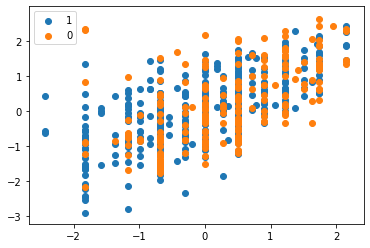

In [52]:
for label, _ in counter.items():
    row_ix = where(y_train == label)[0]
    pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [53]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [54]:
counter = Counter(y_train_smote)
print(counter)

Counter({1: 481, 0: 481})


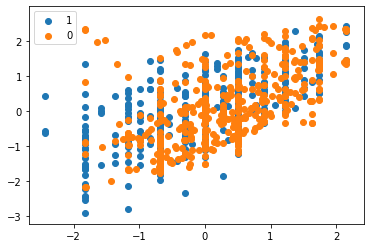

In [55]:
for label, _ in counter.items():
    row_ix = where(y_train_smote == label)[0]
    pyplot.scatter(X_train_smote[row_ix, 0], X_train_smote[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We may notice on the graph presented above that the algorithm SMOTE generated additional instance for class "0".

In [56]:
algorithm_list ={'Logistic Regression OS': LogisticRegression(), 
                  'Random Forest OS': RandomForestClassifier(), 
                  'Decision Tree OS': DecisionTreeClassifier(),
                  'SVM OS': SVC(probability = True)}

In [57]:
fit_classifier(algorithm_list, X_train_smote, X_test, y_train_smote, y_test)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731
9,Logistic Regression GS,0.803333,0.833333,0.913242,0.871460,0.709707,0.419415


Oversampling method lead to better results than undersampling technique for **Logistic Regression**. However, still **SVM** with undersampling has lead to the highest Gini Score among all of the algorithms presented above.

We will also implement RandomUnderSampler so as to reduce a bit the number of observations in the majority class. We will set the ratio between majority and minority class equal to 0,7.

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [59]:
over = SMOTE(sampling_strategy=0.5) 
under = RandomUnderSampler(sampling_strategy=0.7)

In [60]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [61]:
X_train_rus, y_train_rus = pipeline.fit_resample(X_train, y_train)

In [62]:
counter = Counter(y_train_rus)
print(counter)

Counter({1: 342, 0: 240})


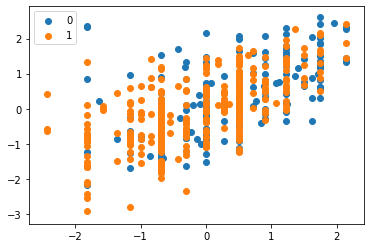

In [63]:
for label, _ in counter.items():
    row_ix = where(y_train_rus == label)[0]
    pyplot.scatter(X_train_rus[row_ix, 0], X_train_rus[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [64]:
algorithm_list ={'Logistic Regression OS_2': LogisticRegression(), 
                  'Random Forest OS_2': RandomForestClassifier(), 
                  'Decision Tree OS_2': DecisionTreeClassifier(),
                  'SVM OS_2': SVC(probability = True)}

In [65]:
fit_classifier(algorithm_list, X_train_rus, X_test, y_train_rus, y_test)

,Method,Accuracy,Precision,Recall,F1,AUC,Gini
0,Logistic Regression,0.786667,0.841410,0.872146,0.856502,0.713851,0.427702
1,Random Forest,0.766667,0.809129,0.890411,0.847826,0.661255,0.322510
2,Decision Tree,0.710000,0.817308,0.776256,0.796253,0.653560,0.307120
3,SVM,0.800000,0.824490,0.922374,0.870690,0.695755,0.391510
4,Bagging Classifier,0.693333,0.806763,0.762557,0.784038,0.634365,0.268730
5,AdaBoost,0.773333,0.832599,0.863014,0.847534,0.696939,0.393878
6,Gradient Boosting,0.770000,0.820513,0.876712,0.847682,0.679097,0.358194
7,Voting Classifier_soft,0.790000,0.825000,0.904110,0.862745,0.692796,0.385591
8,Voting Classifier_hard,0.800000,0.821862,0.926941,0.871245,0.691865,0.383731
9,Logistic Regression GS,0.803333,0.833333,0.913242,0.871460,0.709707,0.419415


Implementing **RandomUnderSampler** improved the scores for **Decision Tree** and **SVM**. 

Based on the scores presented above, the best models when it comes to Gini Coefficient are **SVM** with undersampled majority class _(Gini = 0,495)_ and **Logistic Regression** with oversampled minority class _(Gini = 0,492)_. Some additionall measures will be presented for these two models.

In [153]:
np.save("./Data/method.npy", Algorithm_name_list)
np.save("./Data/accuracy.npy", Accuracy_list)
np.save("./Data/precision.npy", Precision_list)
np.save("./Data/recall.npy", Recall_list)
np.save("./Data/F1.npy", F1_score_list)
np.save("./Data/AUC.npy", AUC_list)
np.save("./Data/Gini.npy", Gini_list)

## 5. Additional measures

With the aim of explaining more the winning algorithm **SVM implemented with undersampled majority class** some additional statistic will be presented.

Additionally, as for SVM with non-linear kernel the feature importance explanation is not available therefore also **Logistic regression with oversampled minority class** will be presented as it is more explainable.

### 5.1 SVM & majority class undersampled

In [96]:
algorithm = SVC(probability=True)
algorithm.fit(X_train_under, y_train_under)
y_pred_train = algorithm.predict_proba(X_train_under)[:, 1]
y_pred = algorithm.predict(X_test)

#### 5.1.1. Confusion matrix

In [101]:
confusion_matrix(y_test, y_pred)

array([[ 63,  18],
       [ 62, 157]], dtype=int64)

Based on the confusion matrix presented above we may notice that the algorithm classified **157** good customers correctly and **63** bad customers correctly. 

On the other hand, **62** good customers were classified as a bad ones and the bank would not grant a loan even though they would pay off the debt in the future. **18** bad customers were incorrectly classified as a good ones and the bank would incur a loss due to unpaid credit.

#### 5.1.2. Classification report

In [103]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.50      0.78      0.61        81
           1       0.90      0.72      0.80       219

    accuracy                           0.73       300
   macro avg       0.70      0.75      0.70       300
weighted avg       0.79      0.73      0.75       300



#### 5.1.3. ROC Curve

In [107]:
y_pred = algorithm.predict_proba(X_test)[:, 1]

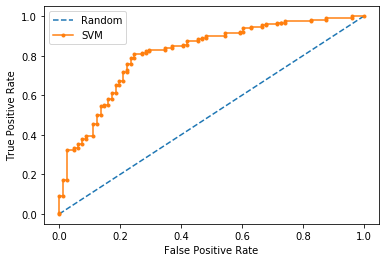

In [108]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Random')
pyplot.plot(fpr, tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### 5.2. Logistic Regression & minority class oversampled (SMOTE)

In [125]:
algorithm = LogisticRegression()
algorithm.fit(X_train_smote, y_train_smote)
y_pred_train = algorithm.predict_proba(X_train_smote)[:, 1]
y_pred = algorithm.predict(X_test)

#### 5.2.1. Confusion matrix

In [126]:
confusion_matrix(y_test, y_pred)

array([[ 58,  23],
       [ 49, 170]], dtype=int64)

Based on the confusion matrix presented above we may notice that the algorithm classified **170** good customers correctly and **58** bad customers correctly. 

On the other hand, **49** good customers were classified as a bad ones and the bank would not grant a loan even though they would pay off the debt in the future. **23** bad customers were incorrectly classified as a good ones and the bank would incur a loss due to unpaid credit.

Comparing to the previously presented confusion matrix this algorithm classified better good customers, however, classifiation of bad customers is worse than previously.

#### 5.2.2. Classification report

In [127]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.54      0.72      0.62        81
           1       0.88      0.78      0.83       219

    accuracy                           0.76       300
   macro avg       0.71      0.75      0.72       300
weighted avg       0.79      0.76      0.77       300



#### 5.2.3. ROC Curve

In [128]:
y_pred = algorithm.predict_proba(X_test)[:, 1]

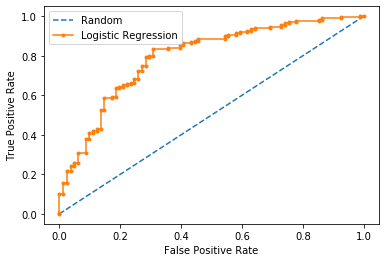

In [129]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Random')
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### 5.3.3. Feature importance

In [130]:
columns = np.load('Data/columns.npy',allow_pickle=True)

In [131]:
columns

array(['Credit_duration', 'Credit_amount', 'Age',
       'Checking_account_status_0<=...<200 DM',
       'Checking_account_status_<0 DM',
       'Checking_account_status_>=200 DM',
       'Checking_account_status_no account',
       'Credit_history_all credits at this bank paid back',
       'Credit_history_credits paid back till now',
       'Credit_history_critical account/ other credits (not this bank)',
       'Credit_history_delay in paying off in the past',
       'Credit_history_no credits/ all paid back', 'Purpose_business',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/ equipment', 'Purpose_new car',
       'Purpose_others', 'Purpose_radio/ television', 'Purpose_repairs',
       'Purpose_retraining', 'Purpose_used car',
       'Savings_100<=...<500 DM', 'Savings_500<=...<1000 DM',
       'Savings_<100 DM', 'Savings_>=1000 DM',
       'Savings_unknow/ no savings', 'Employment_duration_1<=...<4y',
       'Employment_duration_4<=...<7y', 'Em

In [132]:
importance = algorithm.coef_[0]

In [133]:
for i, j in zip(importance, columns):
    print ('Feature:', j, 'Score: %.5f' % (i))

Feature: Credit_duration Score: -0.28520
Feature: Credit_amount Score: -0.30460
Feature: Age Score: 0.21135
Feature: Checking_account_status_0<=...<200 DM Score: -0.40118
Feature: Checking_account_status_<0 DM Score: -0.94044
Feature: Checking_account_status_>=200 DM Score: 0.13567
Feature: Checking_account_status_no account Score: 1.20627
Feature: Credit_history_all credits at this bank paid back Score: -0.52700
Feature: Credit_history_credits paid back till now Score: -0.13419
Feature: Credit_history_critical account/ other credits (not this bank) Score: 0.77835
Feature: Credit_history_delay in paying off in the past Score: 0.34353
Feature: Credit_history_no credits/ all paid back Score: -0.46038
Feature: Purpose_business Score: -0.10404
Feature: Purpose_domestic appliances Score: -0.11568
Feature: Purpose_education Score: -0.88366
Feature: Purpose_furniture/ equipment Score: 0.33055
Feature: Purpose_new car Score: -0.81178
Feature: Purpose_others Score: -0.18239
Feature: Purpose_rad

Coefficients for each of variable used in the model are presented above. The positive values indicate a feature that predict class 1 and negative values indicate a feature that predict class 0.

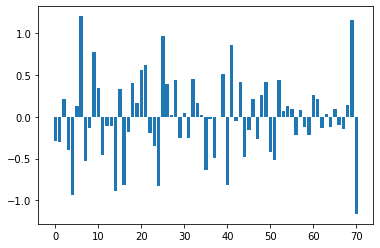

In [134]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

As the model has many features only the main significant for prediction of class 0 and class 1 will be verified.

In [141]:
for i, j in zip(importance, columns):
    if i >= 0.5:
        print ('Feature:', j, 'Score: %.5f' % (i))

Feature: Checking_account_status_no account Score: 1.20627
Feature: Credit_history_critical account/ other credits (not this bank) Score: 0.77835
Feature: Purpose_retraining Score: 0.56701
Feature: Purpose_used car Score: 0.62448
Feature: Savings_>=1000 DM Score: 0.97464
Feature: Status_and_sex_male & single Score: 0.51932
Feature: Other_debtors_guarantors_guarator Score: 0.86484
Feature: Foreign_worker_no Score: 1.16439


According to the model we can notice that potential good customer (class 1):
- is not foreign worker
- has no account
- has more than 1000 DM savings (equal to around 510 EUR)
- has guarantor
- has critical account or other credits (not at this bank)
- has the purpose of credit: retraining or used car
- is male and single

In [142]:
for i, j in zip(importance, columns):
    if i < -0.5:
        print ('Feature:', j, 'Score: %.5f' % (i))

Feature: Checking_account_status_<0 DM Score: -0.94044
Feature: Credit_history_all credits at this bank paid back Score: -0.52700
Feature: Purpose_education Score: -0.88366
Feature: Purpose_new car Score: -0.81178
Feature: Savings_<100 DM Score: -0.82543
Feature: Installment_rate_4 Score: -0.64131
Feature: Other_debtors_guarantors_co-applicant Score: -0.81948
Feature: Other_installment_plans_bank Score: -0.51291
Feature: Foreign_worker_yes Score: -1.16408


According to the model we can notice that potential bad customer (class 0):
- is foreign worker
- has negative current account status
- has the purpose of credit: education or new car
- has less savigs than 100 DM (around 50 EUR)
- has co-applicant for credit
- has all credits at this bank paid back
- his/ her installment rate is equal to 4% of disposable income (the highest percentage for this dataset)
- has other installment plans in the bank


It is worth to mention that one of the features **all credits at this bank paid back** seems to be very unintuitive for potential bad customers and some additional analysis could be carried out so as to verify why the model classified it in this way.

## 6. Summary

To sum up, according to the analysis placed above the best models to distinguish good and bad customers on this dataset were **SVM implemented with undersampled majority class** and **Logistic regression with oversampled minority class (SMOTE)**. The models were evaluated based on Gini Coefficient that is common measure for credit risk models, however, the other scores such as Accuracy, Precision, Recalll, F1 and AUC were also verified. Some of the models had proximate scores therefore the next iteration of the algorithms could lead to another results.

For **Logistic regression with oversampled minority class (SMOTE)** the following features were distinguished as the most significant: whether the customer is foreign worker, the current account status, the purpose of the credit, the amount of savings, credit history and other debtors/ guarantors (the details in section 5.3.3.).

With the aim of improving algorithms some additional tunings and analysis could be made i.e. another alorithms verified, optimal threshold value estimated, more data gathered. It is also worth to mention that in real life not all of the credits are the same for the bank. The cost of not receiving back large mortgage is completely different than not receiving back low credit card debt. Also the types of customers that are applying for different kind of loans may be dissimilar. Therefore different algorithm could be applied to different types of credits so as to improve the predcition.